What are decision trees? It's a tool to assist with making decisions, in a tree like structure, similar to a flow chart; where each branch of the tree is a decision, usually made with some boundaries that decide which branch to follow. A basic decision tree could be of a coin flip, it has two branches which are heads or tails and thats it, the outcome is found at the end of the branch. In this post we'll be using a decision tree to classify the species from the iris dataset, and we'll make a visualisation of the decision surface to see where the tree's boundaries are.

We'll be making use of:

- `sklearn` - a machine learning package
- `plotly` - a visualisation package

Let's start by importing all the neccessary packages

In [1]:
import numpy as np
import plotly
import plotly.graph_objs as go
from IPython.core.display import HTML
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

Before we get into plotting the decision surface for our dataset, let's train a classifier with `sklearn` and visualise the decision tree.

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

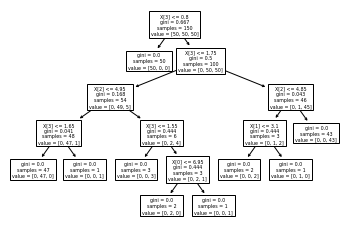

In [6]:
iris = load_iris()
classifier = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(classifier)

Now let's get into the nitty gritty. We're going to make a pairwise plot of comparing decision tree classifiers between each of the features. Since the iris dataset has multiple input features, we would want to compare how well it does when it focuses on each pair of these inputs. We're going to need to do a few things to achieve this:

1. We are going to have to separate the data set into each of the pairs of features
2. Train a decision tree classifier
3. Extract the decision surface of the trained classifier
4. Plot the decision surface with plotly

Note that this would not be possible without the fantastic documentation over at: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

In [8]:
# Parameters
n_classes = 3
plot_colors = "rgb"
plot_step = 0.02

fig = plotly.subplots.make_subplots(rows=2, cols=3)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    y_ = np.arange(y_min, y_max, plot_step)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    heatmap = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=False)

    scatter = go.Scatter(x=X[:, 0], y=X[:, 1], 
                        mode='markers',
                        showlegend=False,
                        marker=dict(size=5,
                                    color=y, 
                                    colorscale='Viridis',
                                    line=dict(color='black', width=1))
                        )

    # Plus one and mods are used because starting index is 1,1 for plotly
    x_plot_location = (pairidx % 2) + 1
    y_plot_location = (pairidx % 3) + 1
    fig.append_trace(heatmap,x_plot_location,y_plot_location)
    fig.append_trace(scatter,x_plot_location,y_plot_location)

HTML(plotly.offline.plot(fig, filename='Descision_tree_pairwise.html',include_plotlyjs='cdn'))